<a href="https://colab.research.google.com/github/JoeBens/Face-Detector/blob/main/Vision_Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import cv2 as cv
!pip install  opencv-contrib-python==3.4.2.17
import cv2 as cv
import os
from google.colab.patches import cv_imshow 
import pandas as pd
import tqdm

     |████████████████████████████████| 30.6 MB 15.3 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


#Data Preprocessing

##Data Download

In [ ]:
!wget https://cloud.isir.upmc.fr/owncloud/index.php/s/WMiMAF4aQqjoZWe/download

--2021-12-13 16:36:39--  https://cloud.isir.upmc.fr/owncloud/index.php/s/WMiMAF4aQqjoZWe/download
Resolving cloud.isir.upmc.fr (cloud.isir.upmc.fr)... 134.157.18.29
Connecting to cloud.isir.upmc.fr (cloud.isir.upmc.fr)|134.157.18.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1056301439 (1007M) [application/zip]
Saving to: ‘download’

download            100%[===================>]   1007M  36.7MB/s    in 28s     

2021-12-13 16:37:07 (36.1 MB/s) - ‘download’ saved [1056301439/1056301439]



In [ ]:
!unzip download

Streaming output truncated to the last 5000 lines.
  inflating: helen/trainset/2169601621_1.jpg  
  inflating: helen/trainset/2169601621_1.pts  
  inflating: helen/trainset/2170250827_1.jpg  
  inflating: helen/trainset/2170250827_1.pts  
  inflating: helen/trainset/2170402460_1.jpg  
  inflating: helen/trainset/2170402460_1.pts  
  inflating: helen/trainset/21705205_1.jpg  
  inflating: helen/trainset/21705205_1.pts  
  inflating: helen/trainset/21710996_1.jpg  
  inflating: helen/trainset/21710996_1.pts  
  inflating: helen/trainset/2172479811_1.jpg  
  inflating: helen/trainset/2172479811_1.pts  
  inflating: helen/trainset/2173271902_1.jpg  
  inflating: helen/trainset/2173271902_1.pts  
  inflating: helen/trainset/2175042512_1.jpg  
  inflating: helen/trainset/2175042512_1.pts  
  inflating: helen/trainset/2175629058_1.jpg  
  inflating: helen/trainset/2175629058_1.pts  
  inflating: helen/trainset/2177168298_1.jpg  
  inflating: helen/trainset/2177168298_1.pts  
  inflating: hele

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Vision TME Files"

In [ ]:
im = cv.imread(os.path.join(path, "afw/afw/1051618982_1.jpg"))
im_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(im_rgb)

error: ignored

In [ ]:
file1 = open(os.path.join(path, '300w_train_images.txt'), 'r')
lines = file1.readlines()
lines = [line.rstrip() for line in lines]
images_dir = np.array(lines)

file2 = open(os.path.join(path, '300w_train_landmarks.txt'), 'r')
lines2 = file2.readlines()
print(len(lines2))
lines2 = [line.rstrip() for line in lines2]
landmarks = np.array(lines2)

FileNotFoundError: ignored

In [ ]:
import random
images_idx = random.sample(range(0, len(images_dir)), 12)

##Data Visualisation

In [ ]:
axes=[]
fig=plt.figure(figsize = (20,20))


for x,i in enumerate(tqdm.tqdm(images_idx)):
  im = cv.imread(os.path.join(path, images_dir[i]))
  im_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)
  landmarks_points = pd.read_csv(os.path.join(path, landmarks[i]), delimiter = " ", header=None)
  landmarks_points = landmarks_points.to_numpy()

  axes.append( fig.add_subplot(4, 3, x+1) )
  subplot_title=("Image"+str(x))
  axes[-1].set_title(subplot_title)  
  plt.imshow(im_rgb)
  
  plt.scatter(landmarks_points[:,0], landmarks_points[:,1], marker=".")
  
plt.show()

In [ ]:
processed_path = "/content/drive/MyDrive/Vision TME Files/Processed Images"

In [ ]:
def compute_bounding_box(im,landmarks_points):
  
  bounding_box = []

  x_max, x_min = np.max(landmarks_points[:,0]), np.min(landmarks_points[:,0])  
  y_max, y_min = np.max(landmarks_points[:,1]), np.min(landmarks_points[:,1])

  w = x_max - x_min 
  h = y_max - y_min
  bounding_box.append(x_min)
  bounding_box.append(y_min)
  bounding_box.append(w)
  bounding_box.append(h)
    
  return bounding_box

In [ ]:
def Widen(im, bounding_box):

  bounding_box_widened = []

  w = bounding_box[2] 
  h = bounding_box[3]

  ax = w*0.15
  ay = h*0.15

  x_min = bounding_box[0] - ax
  y_min = bounding_box[1] - ay

  hh = h + 2*ay
  ww = w + 2*ax

  bounding_box_widened.append(x_min)
  bounding_box_widened.append(y_min)
  bounding_box_widened.append(ww)
  bounding_box_widened.append(hh)

  return bounding_box_widened

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = cv.imread(os.path.join(path, images_dir[3000]))
im_r = cv.cvtColor(im, cv.COLOR_BGR2RGB)
canvas = im_r.copy()
landmarks_pointss = pd.read_csv(os.path.join(path, landmarks[3000]), delimiter = "\s+", header=None)
landmarks_pointss = landmarks_pointss.to_numpy()

bounding_box1 = compute_bounding_box(im_r,landmarks_pointss)
# print(bounding_box1)
# print(im.shape)
rect1 = matplotlib.patches.Rectangle((int(bounding_box1[0]),int(bounding_box1[1])),
                                     int(bounding_box1[2]),int(bounding_box1[3]),
                                     fc ='none',ec ='g', lw = 1)


bounding_box_widened1 = Widen(im_r, bounding_box1)
# print(bounding_box_widened1)
rect2 = matplotlib.patches.Rectangle((int(bounding_box_widened1[0]),int(bounding_box_widened1[1])),
                                     int(bounding_box_widened1[2]),int(bounding_box_widened1[3]),
                                     fc ='none',ec ='g', lw = 2)


ax.imshow(im_r)
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.scatter(landmarks_pointss[:,0], landmarks_pointss[:,1], marker=".")

plt.show()

In [ ]:
from PIL import Image
def Crop_New_Landmarks(im, landmarks_points, bounding_box):
  x1 = np.abs(int(bounding_box[0]))
  y1 = np.abs(int(bounding_box[1]))

  x2 = np.abs(x1 +int(bounding_box[2]))
  y2 = np.abs(y1 + int(bounding_box[3]))

  landmarks_points[:,0] -= x1
  landmarks_points[:,1] -= y1
  

  landmarks_points[:,0] /= (bounding_box[2])/128
  landmarks_points[:,1] /= (bounding_box[3])/128

  
  cropped = im[y1:y2 , x1:x2]
  resized = cv.resize(cropped, (128,128))

  return resized, cropped, landmarks_points

In [ ]:
resized, cropped , landmarks_points_new = Crop_New_Landmarks(im_r, landmarks_pointss, bounding_box_widened1)
print(landmarks_points_new.shape)
cv.imwrite("test.jpg", resized)
np.savetxt("test.pts", landmarks_points_new)

plt.figure()
plt.imshow(resized)
plt.scatter(landmarks_points_new[:,0], landmarks_points_new[:,1], marker=".")
plt.show()
#It works

In [ ]:
def Augment(im, landmarks_points):

  #Compute the bounding box
  bounding_box = compute_bounding_box(im,landmarks_points)
  #Widen the bounding box
  bounding_box_widened = Widen(im, bounding_box)
  #Crop, Compute new Landmarks and save
  resized, cropped, landmarks_points_new = Crop_New_Landmarks(im, landmarks_points, bounding_box_widened)
  
  return resized, landmarks_points_new

In [ ]:
landmarks_for_mean = []
for i in tqdm.tqdm(range(0, len(images_dir))):
  im = cv.imread(os.path.join(path, images_dir[i]))
  im_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)

  landmarks_points = pd.read_csv(os.path.join(path, landmarks[i]), delimiter = "\s+", header=None)
  landmarks_points = landmarks_points.to_numpy()
  landmarks_for_mean.append(landmarks_points)

  processed, processed_landmarks = Augment(im_rgb, landmarks_points)
  cv.imwrite(os.path.join(processed_path, "Image" + str(i)) + ".jpg", processed)
  np.savetxt(os.path.join(processed_path, "Image" + str(i) + ".pts"), processed_landmarks)



In [ ]:
images_idx = random.sample(range(0, len(images_dir)), 12)
axes=[]
fig=plt.figure(figsize = (20,20))

for x,i in enumerate(tqdm.tqdm(images_idx)):
  im= cv.imread(os.path.join(processed_path, "Image" +str(i)+".jpg"))
  
  landmarks_points = pd.read_csv(os.path.join(processed_path, "Image" +str(i)+".pts"), delimiter = "\s+", header=None)
  landmarks_points = landmarks_points.to_numpy()
  axes.append( fig.add_subplot(4, 3, x+1) )
  subplot_title=("Image"+str(x))
  axes[-1].set_title(subplot_title)  
  plt.imshow(im)
  
  plt.scatter(landmarks_points[:,0], landmarks_points[:,1], marker="X", c='yellow')
  
plt.show()


In [ ]:
landmarks_mean = np.mean(landmarks_for_mean, axis = 0)
np.save(os.path.join(processed_path, "mean.npy"),landmarks_mean)

landmarks_mean.shape

(68, 2)

In [ ]:
np.save(os.path.join(processed_path, "landmarks_for_mean.npy"),landmarks_for_mean)

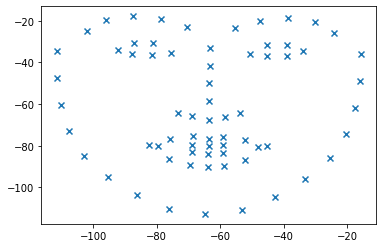

In [ ]:
mean_landmarks = np.load(os.path.join(processed_path, "mean.npy"))
plt.figure()
plt.scatter(-mean_landmarks[:,0], -mean_landmarks[:,1], marker="x")
plt.show()

In [ ]:
translation = np.random.uniform(low=-20, high=20, size=(10,2))
scale = np.random.uniform(low=0.8, high=1.2, size=10)


In [ ]:
def data_augmentation_by_perturbation(nb_samples,features):
  new_features_test_data_aug = []
  new_features_test = np.array(features)

  for x in new_features_test:
    aug_imgs = np.tile(x, (nb_samples,1,1))
    for i in range(nb_samples):
      aug_imgs[i] += translation[i]
      aug_imgs[i] = (aug_imgs[i] * scale[i]).astype(int)
    new_features_test_data_aug.append(aug_imgs)
  return np.array(new_features_test_data_aug)

In [ ]:
perturbations = data_augmentation_by_perturbation(10, mean_landmarks.reshape((1,mean_landmarks.shape[0],mean_landmarks.shape[1])))

plt.figure()
land = perturbations[0][0]
land1 = perturbations[0][1]
land2 = perturbations[0][2]
land3 = perturbations[0][3]
plt.scatter(-land[:,0], -land[:,1], marker="x")
plt.scatter(-land1[:,0], -land[:,1], marker="x")
plt.scatter(-land2[:,0], -land[:,1], marker="x")
plt.scatter(-land3[:,0], -land[:,1], marker="x")
plt.show()



NameError: ignored

In [ ]:
all_mean_landmarks = []
all_mean_landmarks.append(mean_landmarks)
for i in range(10):
  all_mean_landmarks.append(perturbations[0][i])
np.save(os.path.join(processed_path, "mean_with_perturbations.npy"), all_mean_landmarks)

In [ ]:
all_keypoints = []
for l in all_mean_landmarks:
  keypoints = []
  for ll in l:
    keypoint = cv.KeyPoint(ll[0],ll[1], 20)
    keypoints.append(keypoint)

  all_keypoints.append(keypoints)
len(all_keypoints)

11

In [ ]:
sift = cv.xfeatures2d.SIFT_create()

In [ ]:
sift = cv.xfeatures2d.SIFT_create()
sifts = []

for i in tqdm.tqdm(range(len(images_dir))):
  im = cv.imread(os.path.join(processed_path, "Image" +str(i)+".jpg"))
  for kp in all_keypoints:
    sift = cv.xfeatures2d.SIFT_create()
    _,descriptors = sift.compute(im, kp)
    sifts.append(descriptors)

sifts = np.array(sifts)
np.save(os.path.join(processed_path, "sifts_np.npy"), sifts)

100%|██████████| 3148/3148 [19:55<00:00,  2.63it/s]


In [ ]:
sifts2 = sifts.reshape((sifts.shape[0],sifts.shape[1]*sifts.shape[2]))

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(0.98)
pca.fit(sifts2)

PCA(n_components=0.98)

In [ ]:
t = pca.transform(sifts2)
t.shape

(34628, 436)

In [ ]:
np.save(os.path.join(processed_path, "pca.npy"), t)

In [ ]:
mean_landmarks = np.load(os.path.join(processed_path, "mean.npy"))
all_mean_landmarks = np.load(os.path.join(processed_path, "mean_with_perturbations.npy"))
pca_result = np.load(os.path.join(processed_path, "pca.npy"))
sifts = np.load(os.path.join(processed_path, "sifts_np.npy"))
landmarks_for_mean = np.load(os.path.join(processed_path, "landmarks_for_mean.npy"))
all_l = np.array(landmarks_for_mean)
mean_landmarks.shape, pca_result.shape, sifts.shape, all_l.shape

((68, 2), (34628, 436), (34628, 68, 128), (3148, 68, 2))

In [ ]:
X0 = np.hstack((pca_result, np.ones((pca_result.shape[0], 1)))).T
X0.shape

(437, 34628)

In [ ]:
all_l = np.repeat(all_l, 11, axis = 0)
all_mean_landmarks = np.array(all_mean_landmarks)
all_m = np.tile(all_mean_landmarks, (len(images_dir), 1, 1))
all_l.shape, all_m.shape

((34628, 68, 2), (34628, 68, 2))

In [ ]:
delta_star = all_l - all_m 

In [ ]:
delta_star = delta_star.reshape(-1, 136)
delta_star.shape

(34628, 136)

In [ ]:
R0 = np.linalg.lstsq(X0.T, delta_star)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [ ]:
loss = np.linalg.norm(((delta_star - X0.T@R0[0])))**2
loss

148927663.24765992

In [ ]:
predict = X0.T@R0[0] 

In [ ]:
predict = predict.reshape(-1,68, 2) + all_m

np.save(os.path.join(processed_path, "predict.npy"), predict)
predict.shape

(34628, 68, 2)

100%|██████████| 12/12 [00:00<00:00, 38.76it/s]


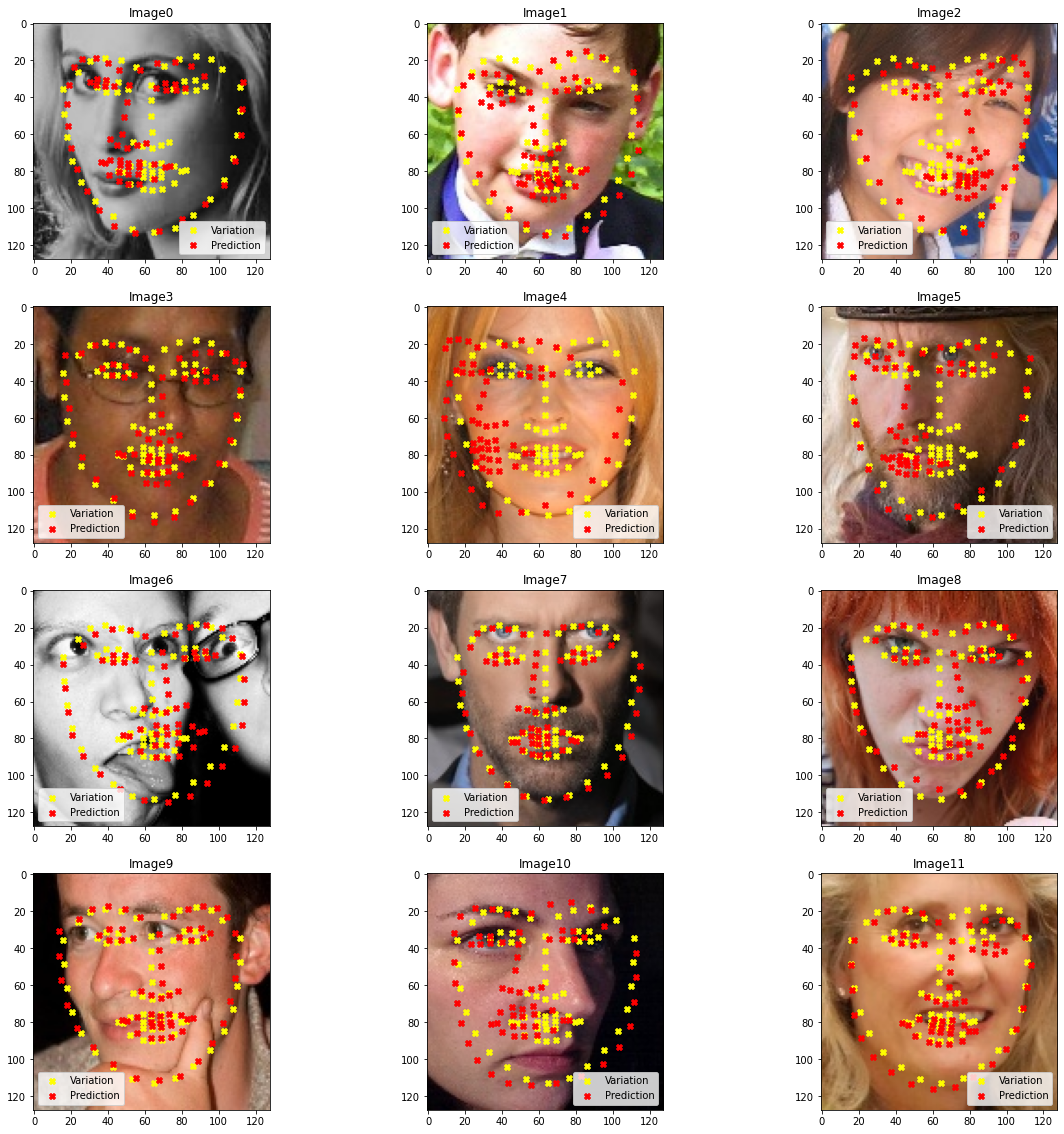

In [ ]:
images_idx = random.sample(range(0, len(images_dir)), 12)
axes=[]
fig=plt.figure(figsize = (20,20))

for x,i in enumerate(tqdm.tqdm(images_idx)):
  im= cv.imread(os.path.join(processed_path, "Image" +str(i)+".jpg"))
  
  landmarks_points = predict[i]
  landmarks_ground_truth = all_l[i*11]
  landmarks_variation= all_m[i*11]

  #print(landmarks_ground_truth == all_l[i])
  axes.append( fig.add_subplot(4, 3, x+1) )
  subplot_title=("Image"+str(x))
  axes[-1].set_title(subplot_title)  
  plt.imshow(im)
  
  
  plt.scatter(landmarks_variation[:,0], landmarks_variation[:,1], c = "yellow", marker="X", label = "Variation")
  plt.scatter(landmarks_points[:,0], landmarks_points[:,1], c = "red", marker="X", label = "Prediction")
  #plt.scatter(landmarks_ground_truth[:,0], landmarks_ground_truth[:,1], c = "blue", marker="X", label = "Ground Truth")
  axes[-1].legend() 


plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(pca_result, delta_star)
prediction = reg.predict(pca_result)

In [ ]:
prediction = prediction.reshape(-1,68, 2) + all_m

100%|██████████| 12/12 [00:00<00:00, 40.39it/s]


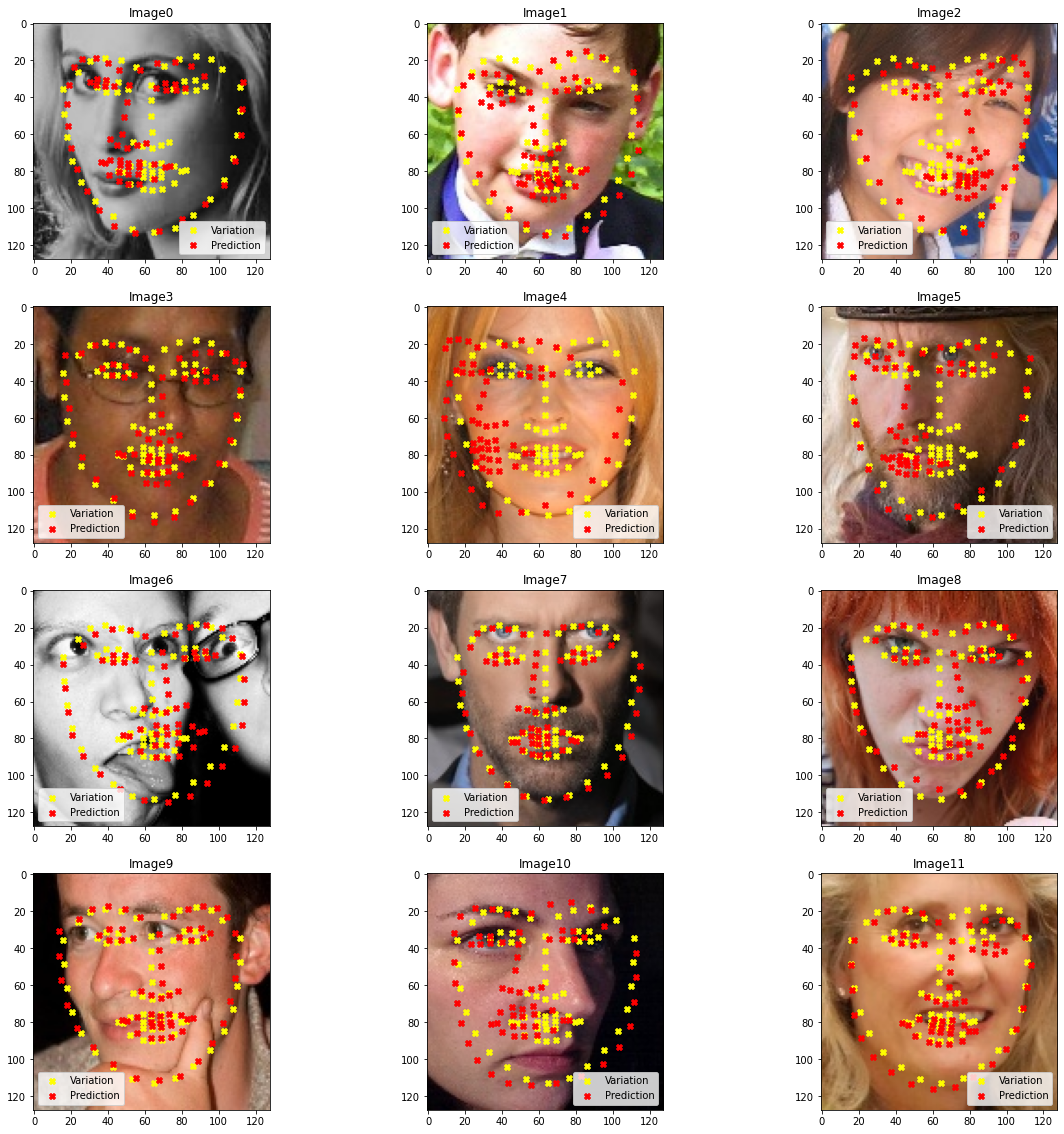

In [ ]:
axes=[]
fig=plt.figure(figsize = (20,20))

for x,i in enumerate(tqdm.tqdm(images_idx)):
  im= cv.imread(os.path.join(processed_path, "Image" +str(i)+".jpg"))
  
  landmarks_points = prediction[i]
  landmarks_ground_truth = all_l[i*11]
  landmarks_variation= all_m[i*11]

  #print(landmarks_ground_truth == all_l[i])
  axes.append( fig.add_subplot(4, 3, x+1) )
  subplot_title=("Image"+str(x))
  axes[-1].set_title(subplot_title)  
  plt.imshow(im)
  
  
  plt.scatter(landmarks_variation[:,0], landmarks_variation[:,1], c = "yellow", marker="X", label = "Variation")
  plt.scatter(landmarks_points[:,0], landmarks_points[:,1], c = "red", marker="X", label = "Prediction")
  #plt.scatter(landmarks_ground_truth[:,0], landmarks_ground_truth[:,1], c = "blue", marker="X", label = "Ground Truth")
  axes[-1].legend() 


plt.show()

In [ ]:
landmarks_test = []
images_dir_test = []

In [ ]:
file1 = open(os.path.join(path, 'helen_testset.txt'), 'r')
lines = file1.readlines()
lines = [line.rstrip() for line in lines]
images_dir_test+=lines
images_dir_test_1 = np.array(lines)

file2 = open(os.path.join(path, 'helen_testset_landmarks.txt'), 'r')
lines2 = file2.readlines()
print(len(lines2))
lines2 = [line.rstrip() for line in lines2]
landmarks_test+=lines2
landmarks_test_1 = np.array(lines2)

330


In [ ]:
file1 = open(os.path.join(path, 'lfpw_testset.txt'), 'r')
lines = file1.readlines()
lines = [line.rstrip() for line in lines]
images_dir_test+=lines
images_dir_test_2 = np.array(lines)

file2 = open(os.path.join(path, 'lfpw_testset_landmarks.txt'), 'r')
lines2 = file2.readlines()
print(len(lines2))
lines2 = [line.rstrip() for line in lines2]
landmarks_test+=lines2
landmarks_test_2 = np.array(lines2)

224


In [ ]:
len(images_dir_test), len(landmarks_test)

(554, 554)

In [ ]:
images_dir_test = np.array(images_dir_test)
landmarks_test = np.array(landmarks_test)

In [ ]:
import random
images_idx = random.sample(range(0, len(images_dir_test)), 12)

100%|██████████| 12/12 [00:06<00:00,  1.75it/s]


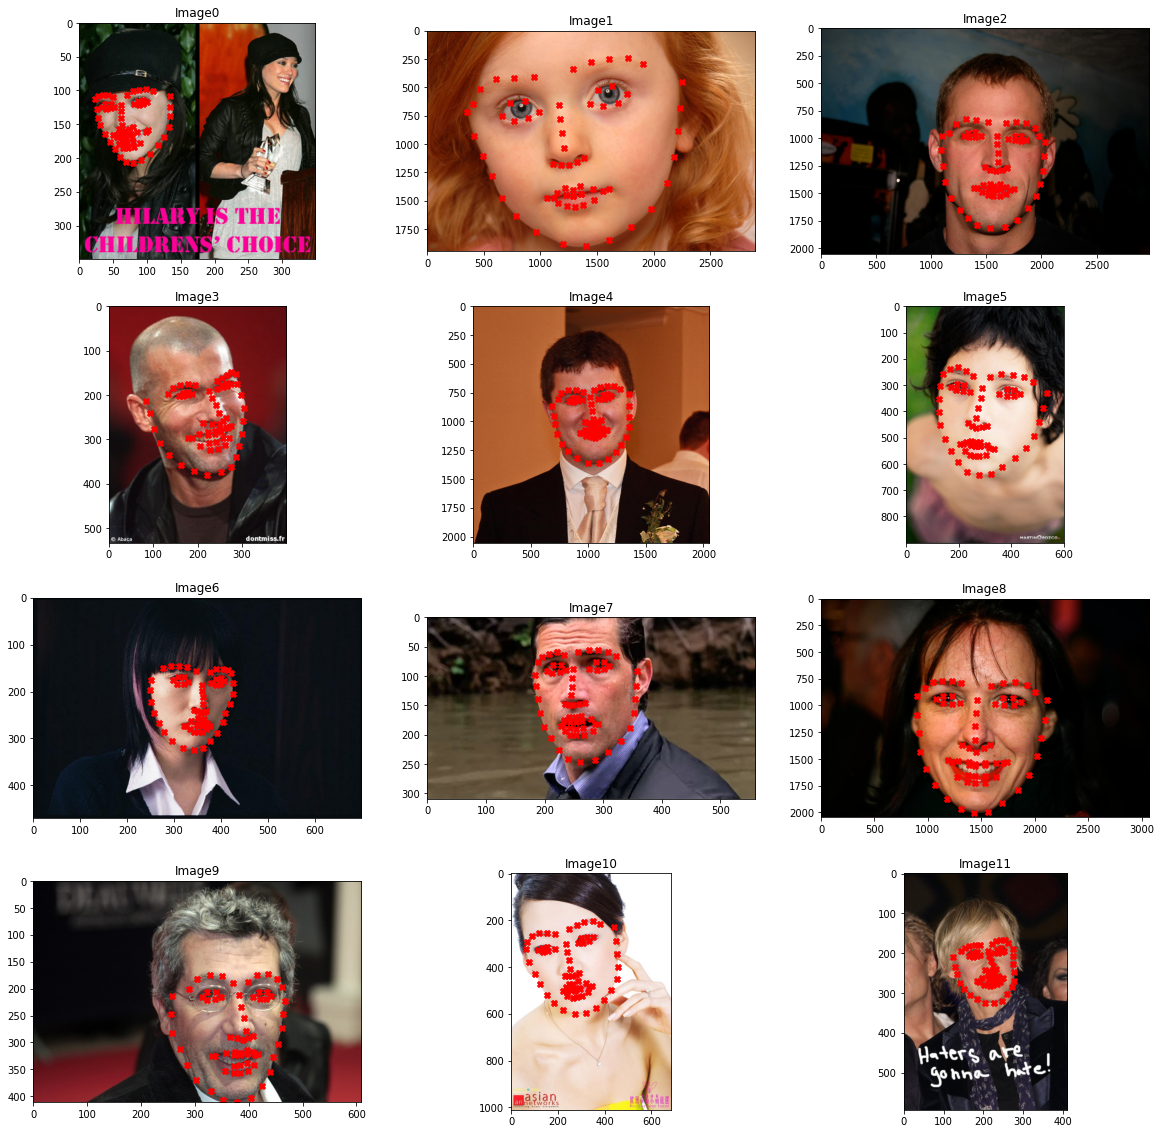

In [ ]:
axes=[]
fig=plt.figure(figsize = (20,20))

for x, i in enumerate(tqdm.tqdm(images_idx)):
  im = cv.imread(os.path.join(path, images_dir_test[i]))
  im_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)
  landmarks_points = pd.read_csv(os.path.join(path, landmarks_test[i]), delimiter = " ", header=None)
  landmarks_points = landmarks_points.to_numpy()
  
  axes.append( fig.add_subplot(4, 3, x+1) )
  subplot_title=("Image"+str(x))
  axes[-1].set_title(subplot_title)  
  plt.imshow(im_rgb)
  

  plt.scatter(landmarks_points[:,0], landmarks_points[:,1], c = "red", marker="X")



plt.show()

In [ ]:
processed_path_test = "/content/drive/MyDrive/Vision TME Files/Processed Images/Test"

In [ ]:
for i in tqdm.tqdm(range(0, len(images_dir_test))):
  im = cv.imread(os.path.join(path, images_dir_test[i]))
  im_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)

  landmarks_points = pd.read_csv(os.path.join(path, landmarks_test[i]), delimiter = "\s+", header=None)
  landmarks_points = landmarks_points.to_numpy()
  #landmarks_for_mean.append(landmarks_points)

  processed, processed_landmarks = Augment(im_rgb, landmarks_points)
  cv.imwrite(os.path.join(processed_path_test, "Image" + str(i)) + ".jpg", processed)
  np.savetxt(os.path.join(processed_path_test, "Image" + str(i) + ".pts"), processed_landmarks)


100%|██████████| 554/554 [09:13<00:00,  1.00it/s]


100%|██████████| 12/12 [00:00<00:00, 41.25it/s]


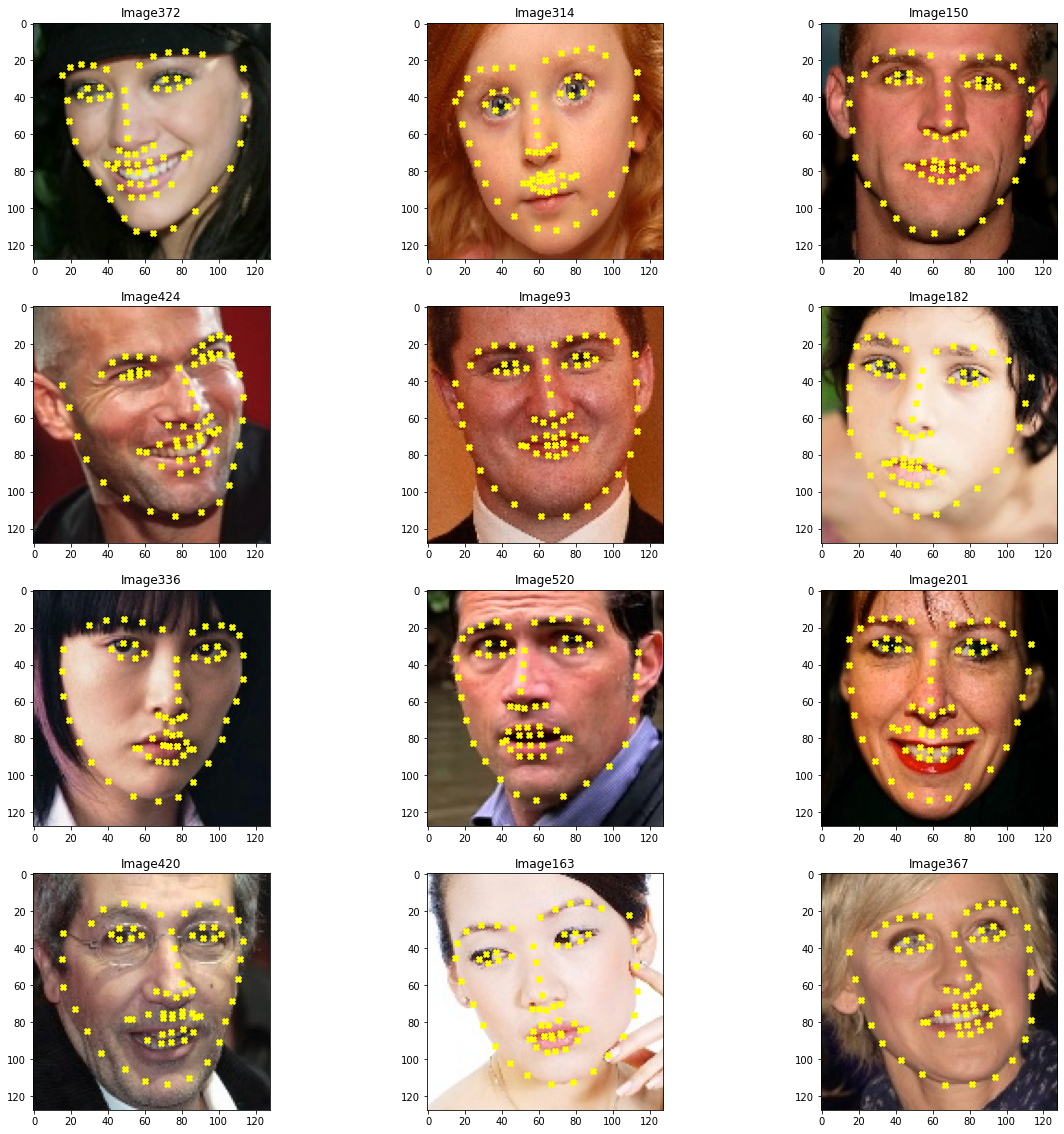

In [ ]:
axes=[]
fig=plt.figure(figsize = (20,20))

for x, i in enumerate(tqdm.tqdm(images_idx)):
  im = cv.imread(os.path.join(processed_path_test, "Image" +str(i)+".jpg"))

  landmarks_points = pd.read_csv(os.path.join(processed_path_test, "Image" +str(i)+".pts"), delimiter = "\s+", header=None)
  landmarks_points = landmarks_points.to_numpy()

  axes.append( fig.add_subplot(4, 3, x+1) )
  subplot_title=("Image"+str(i))
  axes[-1].set_title(subplot_title)  
  plt.imshow(im)
  

  plt.scatter(landmarks_points[:,0], landmarks_points[:,1], c = "yellow", marker="X")
 

plt.show()

In [ ]:
keypoints = []
for ll in mean_landmarks:
  keypoint = cv.KeyPoint(ll[0],ll[1], 20)
  keypoints.append(keypoint)


11

In [ ]:
sifts = []

for i in tqdm.tqdm(range(len(images_dir_test))):
  im = cv.imread(os.path.join(processed_path_test, "Image" +str(i)+".jpg"))

  sift = cv.xfeatures2d.SIFT_create()
  _,descriptors = sift.compute(im, keypoints)
  sifts.append(descriptors)

sifts = np.array(sifts)
np.save(os.path.join(processed_path_test, "sifts_test.npy"), sifts)

100%|██████████| 554/554 [00:22<00:00, 24.87it/s]


In [ ]:
sifts.shape

(554, 68, 128)

In [ ]:
sifts_test = sifts.reshape((sifts.shape[0],sifts.shape[1]*sifts.shape[2]))

In [ ]:
pca_result_test = pca.transform(sifts_test)
pca_result_test.shape

(554, 436)

In [ ]:
X0_test = np.hstack((pca_result_test, np.ones((pca_result_test.shape[0], 1)))).T
X0_test.shape

(437, 554)

In [ ]:
prediction = reg.predict(pca_result_test)

In [ ]:
prediction = prediction.reshape(-1,68, 2) + mean_landmarks

100%|██████████| 12/12 [00:00<00:00, 35.49it/s]


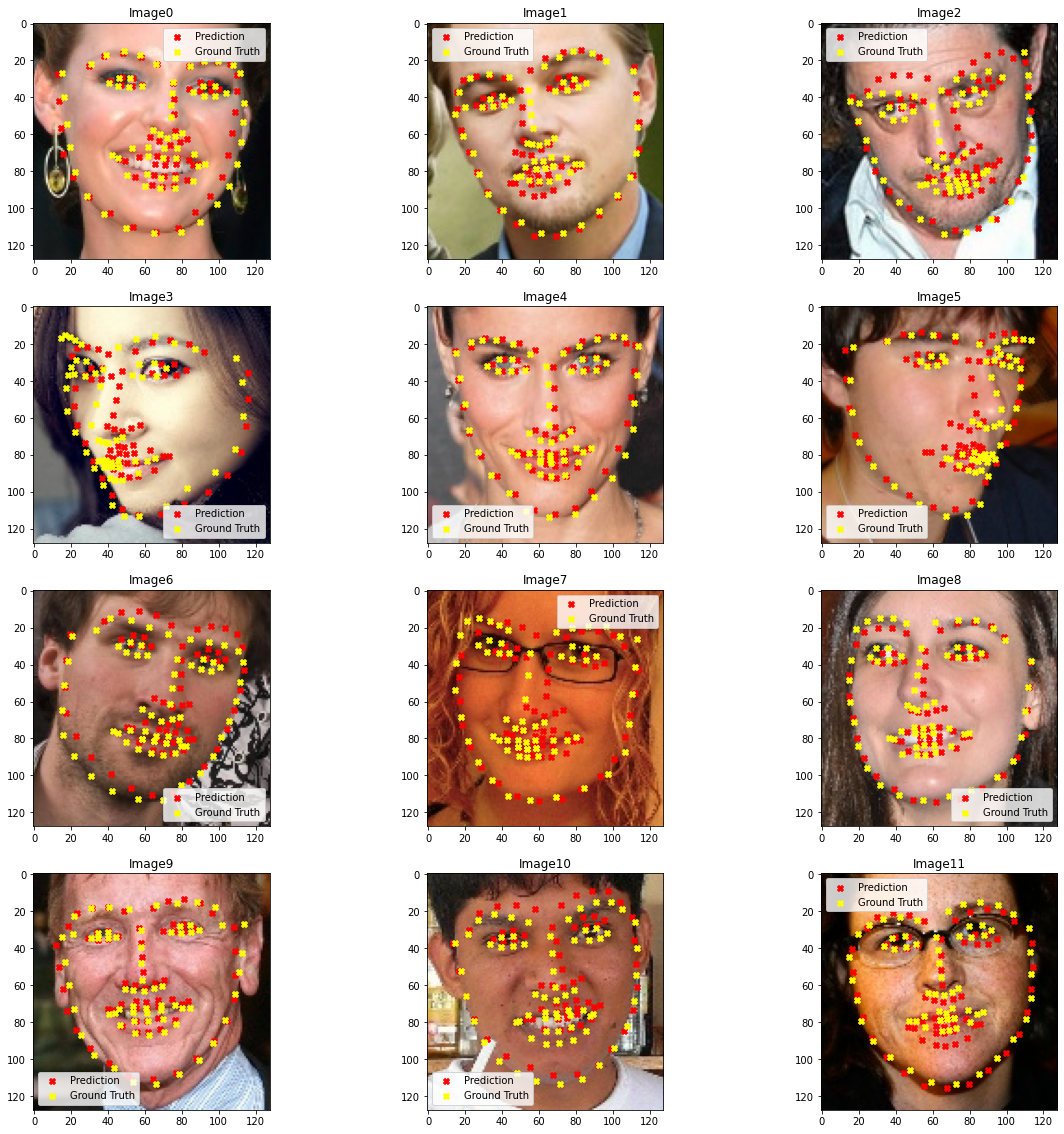

In [ ]:
axes=[]
fig=plt.figure(figsize = (20,20))

for x,i in enumerate(tqdm.tqdm(images_idx)):
  im= cv.imread(os.path.join(processed_path_test, "Image" +str(i)+".jpg"))
  
  landmarks_points = prediction[i]
  landmarks_ground_truth = pd.read_csv(os.path.join(processed_path_test, "Image" +str(i)+".pts"), delimiter = "\s+", header=None)
  landmarks_ground_truth = landmarks_ground_truth.to_numpy()
  #landmarks_variation= all_m[i*11]

  #print(landmarks_ground_truth == all_l[i])
  axes.append( fig.add_subplot(4, 3, x+1) )
  subplot_title=("Image"+str(x))
  axes[-1].set_title(subplot_title)  
  plt.imshow(im)
  
  
  #plt.scatter(landmarks_variation[:,0], landmarks_variation[:,1], c = "yellow", marker="X", label = "Variation")
  plt.scatter(landmarks_points[:,0], landmarks_points[:,1], c = "red", marker="X", label = "Prediction")
  plt.scatter(landmarks_ground_truth[:,0], landmarks_ground_truth[:,1], c = "yellow", marker="X", label = "Ground Truth")
  axes[-1].legend() 


plt.show()